## First circuit

In [78]:
from qiskit import QuantumCircuit

In [79]:
## 8 qbits
qc_output = QuantumCircuit(8)

In [80]:
## Adding measurement
qc_output.measure_all()

In [81]:
## Drawing circuit
qc_output.draw(initial_state=True) 

░ ┌─┐                     
  q_0: |0>─░─┤M├─────────────────────
           ░ └╥┘┌─┐                  
  q_1: |0>─░──╫─┤M├──────────────────
           ░  ║ └╥┘┌─┐               
  q_2: |0>─░──╫──╫─┤M├───────────────
           ░  ║  ║ └╥┘┌─┐            
  q_3: |0>─░──╫──╫──╫─┤M├────────────
           ░  ║  ║  ║ └╥┘┌─┐         
  q_4: |0>─░──╫──╫──╫──╫─┤M├─────────
           ░  ║  ║  ║  ║ └╥┘┌─┐      
  q_5: |0>─░──╫──╫──╫──╫──╫─┤M├──────
           ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
  q_6: |0>─░──╫──╫──╫──╫──╫──╫─┤M├───
           ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
  q_7: |0>─░──╫──╫──╫──╫──╫──╫──╫─┤M├
           ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 0 8/════╩══╩══╩══╩══╩══╩══╩══╩═
              0  1  2  3  4  5  6  7

In [82]:
from qiskit import assemble, Aer
from qiskit.visualization import plot_histogram

In [83]:
## Simulating circuit
simulation = Aer.get_backend('aer_simulator') 
result = simulation.run(qc_output).result()

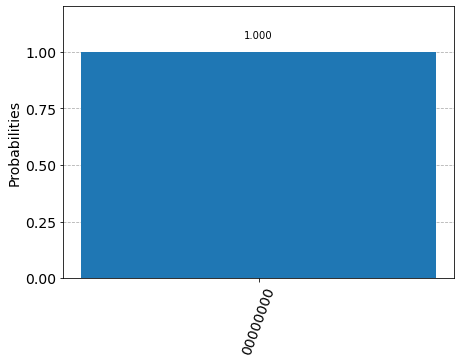

In [84]:
## Plotting histogram of result and getting |00000000> 100% of the time
counts = result.get_counts()
plot_histogram(counts,color="tab:blue")

## Second circuit

In [85]:
## 8 qbits
qc_encode = QuantumCircuit(8)

In [86]:
## Encoding Pauli-x in seven'th string of circuit
qc_encode.x(7)
## Adding measurement
qc_encode.measure_all()
## Drawing
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

In [87]:
# Simulating
simulation = Aer.get_backend('aer_simulator') 
result = simulation.run(qc_encode).result()

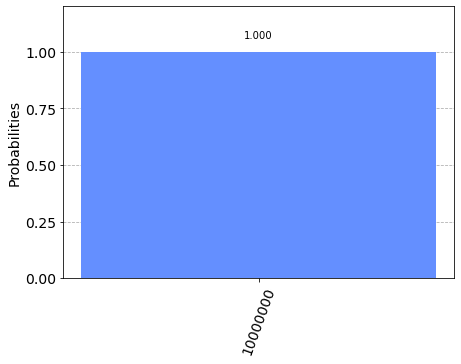

In [91]:
## Plotting histogram of result and getting |10000000> 100% of the time (bit flip of last qbit)
counts = result.get_counts()
plot_histogram(counts)

## Binary addition circuit

In [89]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1 as |11> (we are calculating 1+1 = 2, which is 10 in binary)
qc_ha.x(0) 
qc_ha.x(1) 
qc_ha.barrier() ## Just visual seperating in circuit
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier() ## Just visual seperating in circuit
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value
qc_ha.draw()


┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

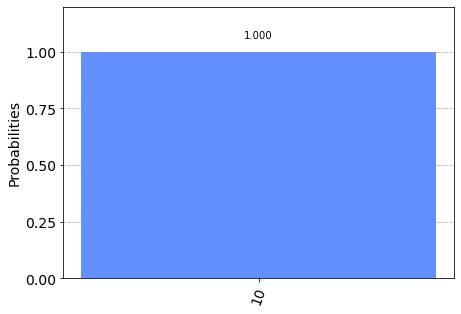

In [90]:
## Simulating and checking that result is 1+1=2, corresponding to '10' in binary 
qobj = assemble(qc_ha)
simulation = Aer.get_backend('aer_simulator') 
counts = simulation.run(qobj).result().get_counts()
plot_histogram(counts)